In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index='')

## Understanding the data

In [6]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

### The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [21]:
boston_df.rename(columns={'Unnamed: 0':'Index'},inplace=True)

In [22]:
boston_df.set_index('Index')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Index,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9


In [25]:
# get the ratio of missing data
boston_df.apply(lambda x:sum(x.isnull())/len(x),axis=0)

Index      0.0
CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

### Generate Descriptive Statistics and Visualizations

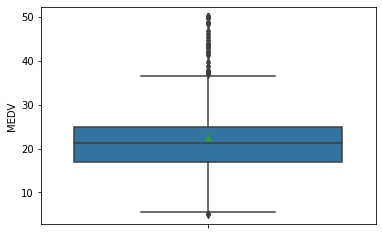

In [27]:
#1. boxplot of the median value of owner-ocupied homes ('MEDV')
sns.boxplot(y='MEDV',data=boston_df,showmeans=True)
#It is clearly found that there are outliers


(array([471.,   0.,   0.,   0.,  35.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

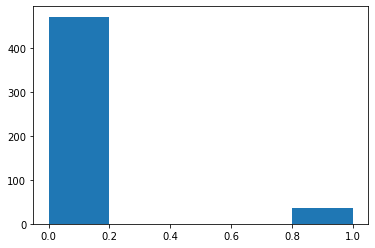

In [33]:
#Provide a histogtam for the Charles river variable
plt.hist(boston_df['CHAS'],bins=5)

### Provide a boxplot for the MEDV variable vs the AGE variable
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [67]:
boston_df['agegroup']=pd.cut(boston_df['AGE'],bins=[0,35,70,100])


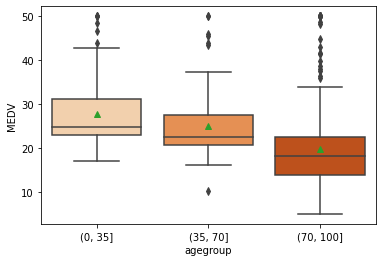

In [69]:
sns.boxplot(x='agegroup',y='MEDV',data=boston_df,showmeans=True,palette='Oranges')

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

,NOX,INDUS
NOX,1.000000,0.763651
INDUS,0.763651,1.000000


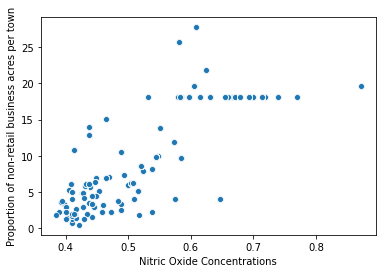

In [75]:
sns.scatterplot(x='NOX',y='INDUS',data=boston_df)
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of non-retail business acres per town')

#### It seems a weakly linear relationship for NOX in the range of 0-0.65  

### Create a histogram for the pupil to teacher ratio variable

Text(0.5, 0, 'the pupil to teacher ratio')

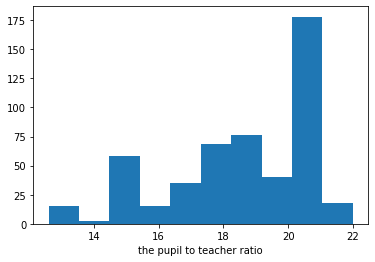

In [78]:
plt.hist(boston_df['PTRATIO'],bins=10)
plt.xlabel('Pupil to Teacher Ratio')

### Is there a significant difference in median value of houses bounded by the Charles river or not

In [79]:
#t-test:
#null hypothesis:there is no significant different 
river0 = boston_df[boston_df['CHAS']==0]['MEDV']
river1 = boston_df[boston_df['CHAS']==1]['MEDV']

In [82]:
#firstly, the Levene test tests the null hypothesis that all input samples are from populations with equal variances
leveneTest = stats.levene(river0,river1)


In [84]:
leveneTest
#here pvalue is smaller than 0.05, therefore reject the null hypothesis, that means their variances are not the same

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [86]:
stats.stats.ttest_ind(river0,river1, equal_var=False)
#equal_var=False meaning their variance is not the same

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

#### pvalue of t-test is smaller than 0.05, therefore reject the null hypothes.
Conclusion:There is significant difference in median value of houses bounded by charles rive or not 

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [100]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [92]:
#creat a model from a formula and datframe
model = ols('MEDV ~ C(AGE)', data = boston_df).fit()

In [93]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(AGE),355.0,29884.038419,84.18039,0.984009,0.55397
Residual,150.0,12832.256996,85.54838,NaN,NaN


#### Pvalue is 0.55, therefore canot reject the null hypthesis. 
Conclusion:there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [95]:
boston_df[['NOX','INDUS']].corr(method='pearson')

,NOX,INDUS
NOX,1.000000,0.763651
INDUS,0.763651,1.000000


#### The Pearson correlation coefficient is 0.76. 
We cannot conclude that there is no relationship between NOX and INDUS.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [107]:
X = boston_df['DIS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X)
y = boston_df['MEDV']
model = ols('y~X',data=boston_df).fit()
predictions = model.predict(X)

#print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 01 Feb 2021   Prob (F-statistic):           1.21e-08
Time:                        12:14:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1950      0.409     22.499      0.000       8.392       9.998
X[0]           9.1950      0.409     22.499      0.000       8.392       9.998
X[1]           1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                     2.12e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.29e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### It is concluded that the pvalue is samller than 0.05 and thus we can reject the hypothesis. There is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. 